Math087 - Mathematical Modeling
===============================
[Tufts University](http://www.tufts.edu) -- [Department of Math](http://math.tufts.edu)  
[Arkadz Kirshtein](https://math.tufts.edu/people/facultyKirshtein.htm) <arkadz.kirshtein@tufts.edu>  
*Fall 2023*

*Based on materials created by James Adler and George McNinch*

Course material (Class 17): Least squares
----------------------------------------------------------------

Linear Least Squares
====================

We are going to begin our discussion fo "least squares" approximation with an example.

Example
-------

Consider a stretch of road with four distinct reference points **A**, **B**, **C**, and **D**:

[**A**] ----``x1``----- [**B**] ---``x2``------ [**C**] ---``x3``------[**D**]  

Write ``x1`` = **AB** for the distance from **A** to **B**, ``x2`` = **BC**, ``x3`` = **CD**.

We take some measurements -- which potentially reflect errors -- , and we seek the *best approximation* to the distances ``x1, x2, x3``.

The measurements taken are as follows:

|||||||
| ------: | ------:| ------:| ------:| ------:| ------:|
| segment | **AD** | **AC** | **BD** | **AB** | **CD** |
| length  | 89 m   | 67 m   | 53 m   | 35 m   | 20 m   |



Thus the observations suggest the following equations:

``(1)  x1 + x2 + x3 = 89``  
``(2)  x1 + x2      = 67``  
``(3)       x2 + x3 = 53``  
``(4)  x1           = 35``  
``(5)            x3 = 20``

These equations aren't compatible, though. Note e.g. that equations ``(3) -- (5)`` indicate the following:

``x1 = 35, x3 = 20, x2 = 53-20 = 33``

but then we find that

``x1 + x2 + x3 = 35 + 33 + 20 = 88``

which is incompatible with ``(1)``.

And we find that 

``x1 + x2 = 35 + 33 = 68`` 

which is incompatible with ``(2)``.


Let's formulate these equalities in matrix form.

Thus let 
$$A = \begin{pmatrix}
1 & 1 & 1 \\
1 & 1 & 0 \\
0 & 1 & 1 \\
1 & 0 & 0 \\
0 & 0 & 1 
\end{pmatrix}, \quad
\mathbf{x} = \begin{pmatrix}
x_1 \\ x_2 \\ x_3 
\end{pmatrix},
\quad
\mathbf{b} = \begin{pmatrix}
89 \\ 67 \\ 53 \\ 35 \\ 20
\end{pmatrix}.$$

With these notations, the above equations suggest that $A\mathbf{x}$ should be equal to $\mathbf{b}$.

Our observation(s) in the preceding slides show, however, that the system of equations
$A \mathbf{x} = \mathbf{b}$
is *inconsistent* (i.e. there is no vector $\mathbf{x}$ which makes the equation true).


Residual
--------

In general, given an $m\times n$ matrix $A$, a column vector $\mathbf{b} \in \mathbb{R}^m$ and an equation
$A \mathbf{x} = \mathbf{b}$, we instead look at the so-called *residual*

$$\mathbf{r} = \mathbf{b} - \mathbf{A}\mathbf{x},$$

and *minimize* this residual.

More precisely, we want to minimize the *magnitude* (or *length*) of this vector.

Thus if $\mathbf{r} = \begin{pmatrix} r_1 & \cdots & r_m \end{pmatrix}^T$, we must minimize the quantity

$$\Vert\mathbf{r}\Vert = \left(\sum_{i=1}^m r_i^2 \right)^{1/2}$$

Here $\Vert \mathbf{r} \Vert$ is the magnitude, also called the Euclidean norm, of the vector $\mathbf{r}$.



In fact, because $f(x) = \sqrt{x}$ is an increasing function of $x$, we instead minimize the *square* of the magnitude of $\mathbf{r}$::

$$\Vert\mathbf{r}\Vert^2 = \sum_{i=1}^m r_i^2$$

Thus, we wish to find

$$\min_{\mathbf{x}} \Vert \mathbf{r} \Vert^2 = \min_{\mathbf{x}} \Vert \mathbf{b} - A \mathbf{x} \Vert^2
= \min_{x_1,x_2,\dots,x_n} \sum_{i=1}^m \left( b_i - \sum_{j=1}^n A_{ij} x_j \right)^2$$

The idea behind this minimization is to first compute for $1 \le k \le n$ 
the partial derivatives $\dfrac{\partial F}{\partial x_k}$ of the function
$$F(x_1,x_2,\dots,x_n)  = \sum_{i=1}^m \left( b_i - \sum_{j=1}^n A_{ij} x_j \right)^2$$

Critical points - and thus possible minima - for $F$ occur at points $\mathbf{x}$ for which
all $\dfrac{\partial F}{\partial x_k}(\mathbf{x}) = 0$.



Now,
$$\dfrac{\partial F}{\partial x_k} = \sum_{i=1}^m 2\left(b_i - \sum_{j=1}^n A_{ij} x_j\right)(-A_{ik})
= 2\left( \sum_{i=1}^m (-A_{ik}b_i) + \sum_{i=1}^m A_{ik} \sum_{j=1}^n A_{ij}x_j \right)$$

and this expression is equal to the $k$-th coefficient of the vector
$$2\left(-A^T \mathbf{b} + A^T A \mathbf{x} \right)$$

Thus, the condition $\dfrac{\partial F}{\partial x_k} = 0$ for all $k$ is equivalent to the so-called *normal equations*:

$$(\diamondsuit) \quad A^T A \mathbf{x} = A^T \mathbf{b}.$$

Thus the solutions $\mathbf{x}$ to the normal equations $(\diamondsuit)$ are precisely the critical points of the function $F$.




Recall that $A \in \mathbb{R}^{m \times n}$. Thus, $A^T \in \mathbb{R}^{n \times m}$ so that 
the matrix $A^TA$ is $n \times n$; in particular, $A^T A$ is always a square matrix.

Moreover, $A^T A$ is *symmetric*, since

$$(A^T A)^T = A^T (A^T)^T = A^T A.$$

We are interested here in the case of *overdetermined systems* -- i.e. in the case where $A$ has more rows than columns ("more equations than variables"). Thus $m \ge n$.

We also are interested in the case where $A$ has rank $n$ -- i.e.$A$ has $n$ linearly independent columns -- since otherwise we don't expect to have enough information to find $\mathbf{x}$.




Proposition
-----------

Let $A \in \mathbb{R}^{m \times n}$, suppose that $m \ge n$ and that $A$ has rank $n$.
Then $A^T \cdot A$ is invertible.

**Proof:**

Since $A^T \cdot A$ is an $n \times n$ square matrix, the proposition will follow if we argue
that the null space $\operatorname{Null}(A^TA)$ is zero. So: suppose that $\mathbf{v} \in \operatorname{Null}(A^TA)$.

Thus $A^TA\mathbf{v} = 0$ and thus also $\mathbf{v}^T A^T \cdot A \mathbf{v} = 0$.

Now,
$$0 = \mathbf{v}^T A^T \cdot A \mathbf{v} = (A \mathbf{v})^T(A \mathbf{v})$$

and of course for any vector $\mathbf{w}$, we know that 
$$0 = \mathbf{w}^T \mathbf{w} \implies \mathbf{w} = \mathbf{0}.$$

We now conclude that $A\mathbf{v} = 0$, so $\mathbf{v} \in \operatorname{Null}(A)$. Since
$A$ has rank $n$, the Null space of $A$ is equal to zero, and we condlue that $\mathbf{v} = \mathbf{0}$. 

We have now proved that $\operatorname{Null}(A^TA)$ is zero, as required.

**Remark:** What we have really showed is that the symmetric matrix $A^T A$ is *definite*:
$\mathbf{v}^TA^T A \mathbf{v} = 0 \implies \mathbf{v} = \mathbf{0}$.


We finally claim that this solution must minimize the magnitude of the residual.

This depends on a "second derivative test" argument for which I'm not going to give full details.
The main point is that the "second derivative" in this context -- known as the Hessian -- concides
with the matrix $2A^T A$. Now, under our assumptions the matrix $A^T A$ is postive definite, and it follows
that $\mathbf{x}_0$ is a global minimum for the magnitude of the residual!

Return to the example
----------------------

Recall that
$$A = \begin{pmatrix}
1 & 1 & 1 \\
1 & 1 & 0 \\
0 & 1 & 1 \\
1 & 0 & 0 \\
0 & 0 & 1 
\end{pmatrix}, \quad
\mathbf{x} = \begin{pmatrix}
x_1 \\ x_2 \\ x_3 
\end{pmatrix},
\quad
\mathbf{b} = \begin{pmatrix}
89 \\ 67 \\ 53 \\ 35 \\ 20
\end{pmatrix}.$$

So to minimize the magnitude of the residual, we must solve the normal equations:

$$A^T A \mathbf{x} = A^T \mathbf{b}.$$




Now 
$$A^T A = 
\begin{pmatrix}
1 & 1 & 0 & 1 & 0 \\
1 & 1 & 1 & 0 & 0 \\
1 & 0 & 1 & 0 & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
1 & 1 & 1 \\
1 & 1 & 0 \\
0 & 1 & 1 \\
1 & 0 & 0 \\
0 & 0 & 1 
\end{pmatrix}
= \begin{pmatrix}
3 & 2 & 1 \\
2 & 3 & 2 \\
1 & 2 & 3
\end{pmatrix}$$

and
$$A^T \mathbf{b} = \begin{pmatrix}
191 \\ 209\\ 162
\end{pmatrix}$$

So we need to solve the equation

$$\begin{pmatrix}
3 & 2 & 1 \\
2 & 3 & 2 \\
1 & 2 & 3
\end{pmatrix} \cdot
\begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} =
\begin{pmatrix}
191 \\ 209\\ 162
\end{pmatrix}$$

In [1]:
import numpy as np
import numpy.linalg as la

A= np.array([[1,1,1],[1,1,0],[0,1,1],[1,0,0],[0,0,1]])
b = np.array([89,67,53,35,20])


x0=la.solve(A.T @ A, A.T @ b)

def residual(x):
    return b - A @ x

def magnitude(x):
    return np.sqrt(x@x)
    
[x0,magnitude(residual(x0))]

[array([35.125, 32.5  , 20.625]), 1.1726039399558574]

Thus the *least squares solution* is

$$\mathbf{x}_0 = \begin{pmatrix}
35.125 \\ 32.5 \\ 20.625
\end{pmatrix}$$

and 

$$\Vert \mathbf{b} - A \mathbf{x}_0\Vert \approx 1.1726$$

Recall that our "first guess" for a solution (based on some of the measurements) was

$$\mathbf{x}_1 = \begin{pmatrix}
35 \\ 33 \\ 20
\end{pmatrix}$$

The residual is indeed larger for $x_1$:

In [2]:
x1 = np.array([35,33,20])

magnitude(residual(x1))

1.4142135623730951

Let's note that ``numpy`` already implements this least-squares functionality:

-- you can [read more about it here](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html#numpy.linalg.lstsq)

In [2]:
res=la.lstsq(A,b,rcond=None)
res[0]

array([35.125, 32.5  , 20.625])

Application: Curve-fitting
===========================

Linear Regression
------------------

Consider a set of data $y_1,\dots,y_m$ measured at points $x_1,\dots,x_m$.

We'd like to find the *best fit* of a straight line through the points $(x_i,y_i)$ in the plane $\mathbb{R}^2$.

Thus, we'd like to find coefficients $\alpha,\beta$ such that

$$\alpha x_i + \beta \approx y_i \quad (1 \le i \le m).$$

We have two unknowns $a,b$ and $m$ data points, so if $m >2$ this should correspond to an *overdetermined system*.

Application of the method of *Least Squares* discussed above to this problem is known as *linear regression*.

Let's write our system in matrix form, first in the case where $m=3$:

$$\begin{matrix}
\alpha x_1 + \beta = y_1  \\
\alpha x_2 + \beta = y_2  \\
\alpha x_3 + \beta = y_3  
\end{matrix}
\implies
\begin{pmatrix}
x_1 & 1 \\
x_2 & 1 \\
x_3 & 1
\end{pmatrix}
\begin{pmatrix}
\alpha \\ \beta
\end{pmatrix} 
= \begin{pmatrix}
y_1 \\ y_2 \\ y_3
\end{pmatrix}
$$




Our goal is to find $a,b$. Using the method of Least Squares, we consider the normal equations:

Write $A = \begin{pmatrix}
x_1 & 1 \\
x_2 & 1 \\
x_3 & 1
\end{pmatrix}$
and $\mathbf{b} = \begin{pmatrix}
y_1 \\ y_2 \\ y_3
\end{pmatrix}$

So we must solve the matrix equation
$$ A^T A \begin{pmatrix} \alpha \\ \beta
\end{pmatrix} =
A^T \mathbf{b}$$
for $\begin{pmatrix} \alpha \\ \beta
\end{pmatrix} $

Note that $A$ has rank 2 provided that $x_i\ne x_j$ for at least one pair $i \ne j$. Thus
the matrix $A^T A$ is invertible, and so there is a unique least-squares solution $\begin{pmatrix} \alpha \\ \beta
\end{pmatrix} $. 

The line $y = \alpha x + \beta$ is then the *best fit* to the data.

Example:
--------

Let's look at some data of the indicated form.

We first load the arrays ``x`` and ``y``.

In [2]:


x1=np.array( [0.2423001476908293, 0.5131246259108058,
            0.6461774297521172, 1.081718126671276, 1.1066957883683026,
            1.2111192770825507, 1.4107663065070208, 1.4131975649194517,
            1.5419085811341127, 1.54252479268561, 1.6770300002589544,
            1.7551956169308414, 1.7813053516565924, 1.8589163396218567,
            2.1309095689276414, 2.1754282799657187, 2.2037015837896003,
            2.3236943766271545, 2.3350556607482655, 2.4539996228127823,
            2.4576156244809266, 2.923756826621138, 2.9603842447427997,
            2.983549618501935, 3.1807751973214238, 3.2264704664586996,
            3.239574306883238, 3.366259631740789, 3.44332570682743,
            3.499492991470027, 3.5778026905209304, 3.7263844780555875,
            3.748176465962385, 3.7630392531018444, 3.82500728312557,
            3.840703575817898, 3.883434170161646, 3.9204994185997712,
            4.003630198700515, 4.048716471000086, 4.093275391602323,
            4.150511176497722, 4.446436799181704, 4.744462663968328,
            5.006360736646923, 5.061552738339686, 5.186531543235159,
            5.325087321284984, 5.378902191627528, 5.4322553049414335,
            5.579442903857698, 5.657430048039373, 5.676263610166316,
            5.798336865104675, 5.959056467826783, 6.061318417229272,
            6.06964642969886, 6.093223956306707, 6.478158146789935,
            6.536602960843557, 6.659316687948101, 6.687753518577183,
            6.863196862656075, 6.917623848496665, 7.158841237060627,
            7.194629418183499, 7.203946765983015, 7.249367122549896,
            7.261069631339737, 7.287252744675527, 7.346305663767231,
            7.3737179854364925, 7.466367724878489, 7.58659610075152,
            7.715645267370789, 7.782203173483429, 7.785342382089407,
            7.802602022584114, 8.101338980359483, 8.135285482190037,
            8.28839037936026, 8.431493684999166, 8.485586033957622,
            8.85209382371834, 9.047878431454915, 9.05343001103644,
            9.069972112952057, 9.182155314706655, 9.192372350356536,
            9.279577753181126, 9.374682847739509, 9.377466789602028,
            9.399110982574728, 9.480394501454253, 9.566216117340616,
            9.575498300284826, 9.586752014027084, 9.672607630688484,
            9.682121771410525, 9.966366902650725])

y1=np.array([10.678513316453799, 9.584529759457341, 8.933389099016741,
            8.87862266736914, 9.423027222054186, 7.438013534115137,
            6.9311080574968695, 8.290588998022537, 6.9339274272120255,
            6.477263126125214, 7.18255726109394, 7.34354559925455,
            5.848164724350601, 5.934986418528014, 5.739587800186909,
            6.3551105645234145, 4.93116293208016, 5.565267306640516,
            6.068819391147042, 4.2422617728095755, 4.339549441040255,
            3.936934088821659, 3.036014810980061, 2.899422680159072,
            3.288016727330138, 2.483313867446464, 3.620815631303368,
            1.7897486715633344, 2.84696838151993, 1.4267338461837338,
            2.7080781273543795, 1.1292831820994036, 1.067244502477275,
            2.7683112572214843, 2.6058180193619425, 2.648908190074,
            1.3990042102813791, 1.1164319243991843, 1.523589585780395,
            1.882457911030059, 0.7994184343137196, 0.5503403019975655,
            -0.7990859019486943, 0.5249368321797867, -1.1109219031528375,
            -2.0949474411711146, -2.638219680107408, -2.5738678800868238,
            -2.543579233502919, -2.2101226175665847, -3.586059377975382,
            -2.053027871767274, -3.3504551324932588, -3.021599640415171,
            -3.3122306023678876, -4.008657108762145, -4.980069709911616,
            -3.2827675476924436, -3.895938416357931, -4.874969268341777,
            -4.639501130091787, -4.899920594943358, -6.477979961761816,
            -7.0497428499160195, -5.571513677706172, -6.787215252732467,
            -6.2737864213441, -7.758876101699673, -8.114146089194973,
            -6.671329893713388, -6.385436025526582, -6.365364764823218,
            -6.303746443776603, -8.130546525025999, -7.723115107002123,
            -9.361367822284743, -7.946739978331863, -7.220171496026538,
            -9.345989645774747, -8.798860958460038, -9.5706899496564,
            -10.362339180159731, -10.595006740315613, -11.585157343328293,
            -11.855959857781063, -11.232459127265221, -11.106702212311582,
            -11.121677153583464, -11.629010242933319, -12.987414691633676,
            -12.918674413364048, -11.073001314425724, -11.797296747359566,
            -12.257399767617951, -13.879317776583441, -11.758373608587776,
            -13.04069656926525, -13.632789248750406, -12.446490726259036,
            -14.854056289273501])


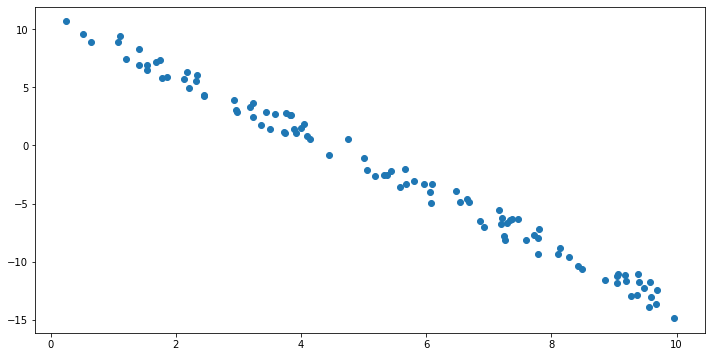

In [3]:
import matplotlib.pyplot as plt

## lists x,y have been populated; lets plot the points
def plot_data(x,y):
    fig, ax = plt.subplots(figsize=(12,6))
    return ax.plot(x,y,"o")

plot_data(x1,y1)

Now let's find perform "linear regression" by solving the corresponding least squares problem. The main
thing to be done is creation of the matrix ``A``.

In [4]:
def lin_fit(x,y):
    # solve the least squares problem
    A = np.array([[xx,1] for xx in x])
    ls=la.lstsq(A,y,rcond=None)

    # get the coefficients and report them
    alpha,beta = ls[0]
    print(f"L(x) = {alpha:.03}*x + {beta:.03}")
    
    # return the linear function determined by these coefficients
    return lambda x:alpha*x + beta
    
L = lin_fit(x1,y1)

L(x) = -2.48*x + 11.0


(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb28054d908>)

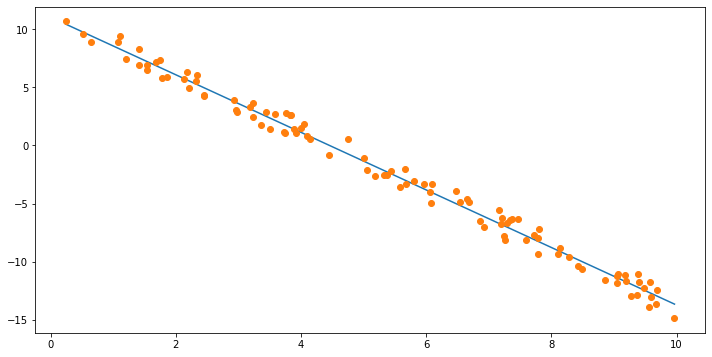

In [7]:
def plot_curve_fit(x0,f,x,y):
    # graph the line with slope alpha and y-intercept beta, and plot the data points
    #
    fig,ax = plt.subplots(figsize=(12,6))
    #ax.plot(x,alpha1*x + beta1)
    ax.plot(x0,f(x0))
    ax.plot(x,y,'o')
    return fig,ax
    
plot_curve_fit(x1,L,x1,y1)

Fitting for higher degree polynomials
-------------------------------------

The preceding example determines a linear function which gives the best fit to the data. But
we can also attempt to match other curves.

Let's try the case of a quadratic polynomial.
Thus, we are given data $x_1,x_2,\dots, x_m$ and $y_1,y_2,\dots,y_m$, and we wish to find coefficients
$\alpha,\beta,\gamma$ such that

$$\alpha {x_i}^2 + \beta x_i + \gamma \approx y_i \quad (1 \le i \le m)$$

Note that the LHS is the $i$-th coefficient in the vector

$$A \cdot \begin{pmatrix}
\alpha \\ \beta \\ \gamma
\end{pmatrix}\qquad
\text{where}
\qquad
A = \begin{pmatrix}
{x_1}^2 & x_1 & 1 \\
{x_2}^2 & x_2 & 1 \\
\vdots & \vdots & \vdots \\
{x_m}^2 & x_m & 1 \\
\end{pmatrix}.$$




So the coefficients $\alpha,\beta,\gamma$ of the best-fitting curve 
$$Q(x) = \alpha x^2 + \beta x + \gamma$$
are obtained by finding the *least squares* solution for the equation

$$A \cdot \begin{pmatrix}
\alpha \\ \beta \\ \gamma
\end{pmatrix}
=
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_m \\
\end{pmatrix}$$


Let's first find the best-fit quadratic polynomial with our previous data set:

In [5]:
#
def quad_fit(x,y):
    # solve the least squares problem
    A = [[xx**2,xx,1] for xx in x]
    res=la.lstsq(A,y,rcond=None)

    # extract & report the coefficients
    alpha,beta,gamma=res[0]
    print(f"Q(x) = {alpha:.03}*x^2 + {beta:.03}*x + {gamma:.03}")
    
    # return the quadratic function determined by these coefficients
    return lambda x:alpha*x**2 + beta*x + gamma

Q = quad_fit(x1,y1)

Q(x) = -0.0103*x^2 + -2.37*x + 10.8


(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb26c625cf8>)

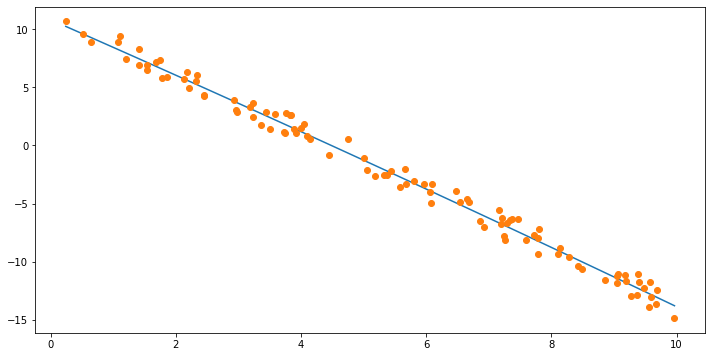

In [9]:
plot_curve_fit(x1,Q,x1,y1)

(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb26c58b6d8>)

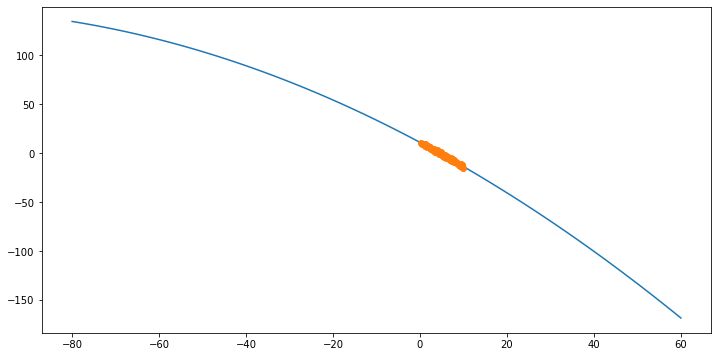

In [10]:
plot_curve_fit(np.linspace(-80,60,100),Q,x1,y1)


New data
---------

We load now some new data ``x2,y2``

In [6]:
x2=np.array([-9.500506098628847, -9.436078956402293,
             -9.164729339392766, -8.45233138486573, -8.307739104979152,
             -7.828001140674944, -7.705455728811295, -7.571960471086983,
             -6.987892876786192, -6.607031656307571, -6.564029048283118,
             -6.393814384261753, -5.998800384719204, -5.7183134001218345,
             -5.560757660996165, -5.313898241447623, -5.180315921867592,
             -4.703049758011512, -4.65291534750819, -4.636925028892335,
             -4.473995832831181, -4.349582934094259, -4.276820618215415,
             -3.9856919476729056, -3.3024763695520782, -2.930284450264594,
             -2.460449933651126, -2.388066289115109, -2.3869772995550846,
             -2.382172607813456, -2.282647403270765, -2.2514206929597433,
             -2.2151987854220563, -1.8688379031501547, -1.040037196669891,
             -0.592982419578636, -0.5285061183473907, -0.07469879485638131,
             -0.03672428155128671, 0.08965963140970601, 0.554605101162359,
             1.2625261558731822, 1.3951852942052394, 1.422010962689896,
             1.5779572321503075, 1.5791882604555276, 1.61640050593763,
             1.8955924638126866, 2.4120975394418576, 2.4275213285530626,
             2.640546120143096, 3.118535721592007, 3.7246612880274874,
             3.778405649802931, 3.818590524157603, 3.8965198726985513,
             3.9968635744727568, 4.05853387329822, 4.842259209080241,
             5.2644529452275215, 5.329049050145095, 5.412276483696772,
             5.820060572107913, 5.824669115601578, 6.398794721957497,
             6.4402471330505975, 6.778030229348008, 6.822865684632326,
             7.154884482248647, 7.433033388040794, 7.95313306257955,
             8.542338054047299, 8.67214809353717, 8.695899516122513,
             8.734604130466039, 8.853944058863625, 8.878828934856866,
             9.052318939780356, 9.05661642071038, 9.362282799156798,
             9.610149658359706, 10.214633633482066, 10.307112596020925,
             10.619306436246774, 10.621964709661611, 10.905709588359596,
             11.16622763212822, 11.50521260209901, 11.629057622884542,
             11.753805653041166, 11.807760553764172, 12.170454913700738,
             12.228946860809256, 12.238348904416945, 12.427719333651723,
             13.053306270918945, 14.03578560105586, 14.327026523434942,
             14.636621765165128, 14.744885176800103])


y2=np.array([242.5396610014489, 262.99748345006117,
             236.21962830726534, 203.36741916361822, 204.59490171086318,
             169.55460040120266, 157.45527545110704, 145.4060333613558,
             158.9329865744686, 145.1180030935003, 103.48587998057566,
             90.98530811955919, 115.82927769102031, 98.2457769772088,
             109.86609808439744, 61.132312437676916, 102.58437854309983,
             80.22317148499344, 60.88436606939928, 58.026728933635454,
             67.27333189547187, 83.32681082764311, 47.84696391123863,
             34.55757018595044, 18.228825041017465, -3.45933210037197,
             41.72125747872123, 20.797350275633658, 45.8894100648326,
             -1.5174797860946683, 0.636099698366511, 29.059890341434148,
             2.311482993391394, -3.4171765808344308, 15.63969965759749,
             -12.776680135544654, 23.635189348858646, -18.932585171656093,
             31.934447339913138, -7.254615510171753, -7.447589708144465,
             21.5170767071797, -10.605455001783469, 37.97690993632591,
             -16.28075900816511, 17.514929406199215, -15.41909805330178,
             -9.28169529245514, 1.6114757958711792, -2.772531397475941,
             31.36303821387554, 48.44461813262329, 21.133120624334147,
             55.09416933352425, 46.091773340771034, 32.460057766234485,
             51.29572119122864, 84.45347100398384, 100.91738746516664,
             118.76834790433631, 89.83233547020102, 103.01856200603174,
             127.02275401927923, 126.50985785898953, 106.89953936401625,
             138.03228724012408, 154.39572040750687, 167.11136504224805,
             166.55137233758427, 185.72301536715477, 184.77395051270676,
             252.36187934583052, 226.68621500173575, 207.63736161137572,
             251.34665622040202, 229.428513458754, 247.93401134715828,
             255.26504804394153, 248.81465414128846, 246.64287358721634,
             300.0379742831173, 324.57035644342176, 359.6415758204655,
             354.6547519583311, 343.8702990976892, 372.48584664055744,
             364.8394942502537, 430.1991994902185, 438.6303667250944,
             403.11528216459146, 412.71074061223993, 453.6054297235233,
             478.9207367814926, 481.9332925595611, 450.91801347136175,
             497.7328569627587, 614.3798601360598, 625.8601324671473,
             672.018324952574, 659.0107875019195])


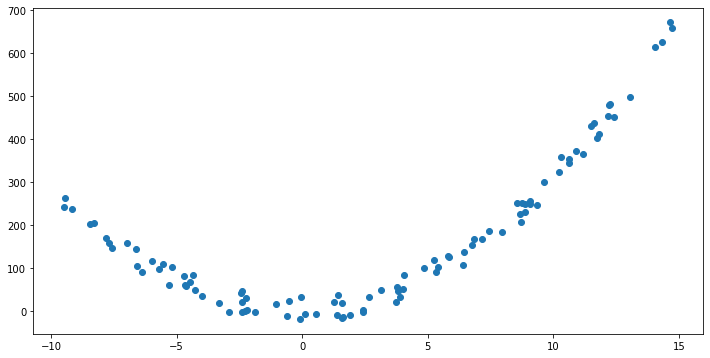

In [12]:
plot_data(x2,y2)

In [13]:
Q2=quad_fit(x2,y2)

Q(x) = 2.97*x^2 + 1.19*x + 2.21


(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb26c47ebe0>)

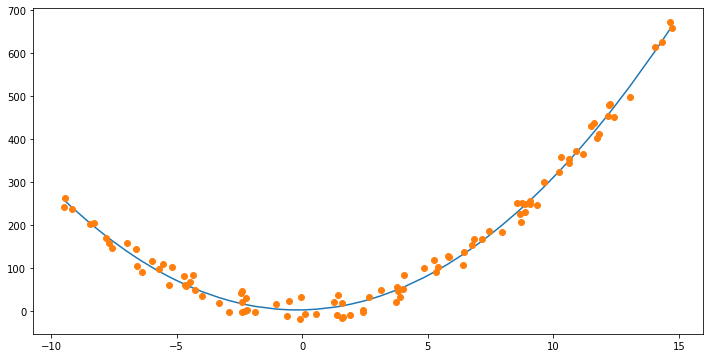

In [14]:
plot_curve_fit(x2,Q2,x2,y2)


L(x) = 16.4*x + 1.22e+02


(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb26c43fa20>)

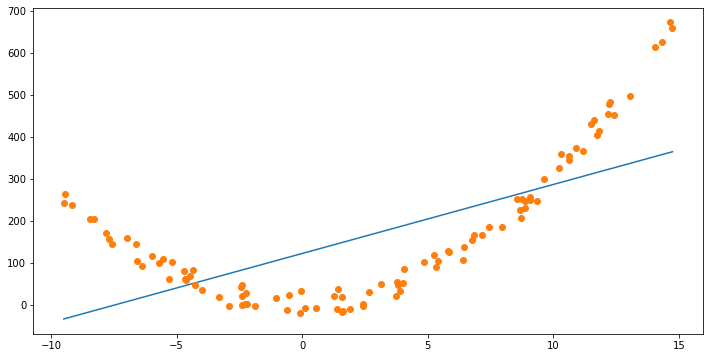

In [15]:
L2=lin_fit(x2,y2)
plot_curve_fit(x2,L2,x2,y2)